***
# <font color = Crimson size = 6> <b>Нормальное распределение</b> </font>

<u>**Унимодальное распределение**</u> \
– распределение, которое имеет только одну моду.

<u>**Нормальное распределение**</u> \
– основополагающее распределение статистики. Его характерными чертами являются **унимодальность**, **симметричность**, а также то, что отклонение наблюдений от среднего подчиняется определеннному вероятностному закону – **законку нормального распределения**.

In [1]:
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

***
## <font color = DarkGreen size = 5> <b>Закон нормального распределения</b> </font>

<u>**Нормальным**</u> называют распределение вероятностей непрерывной случайной величины, которое описывается **плотностью** \
<font size = 4>
$\displaystyle f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-a)^2}{2\sigma^2}}$
</font>, где $a = M(X) \;\;\; \sigma^2 = D(X)$

***
### <font color = MediumBlue size = 4> <b>Правило трех сигм</b> </font>

Отклонение значений от среднего будут равновероятны и подчиняются пределенному вероятностому закону (**правило трех сигм**):
* в диапазоне от среднего $\mu$ до одного стандартного отклонения $\pm\sigma$ будет находиться приблизительно $68\%$ всех наблюдений
* в диапазоне от среднего $\mu$ до двух стандартных отклонений $\pm2\sigma$ – приблизительно $95.4\%$
* в диапазоне от среднего $\mu$ до трех стандартных отклонений $\pm3\sigma$ - приблизительно $99.72\%$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Standard_deviation_diagram_%28decimal_comma%29.svg/1920px-Standard_deviation_diagram_%28decimal_comma%29.svg.png)




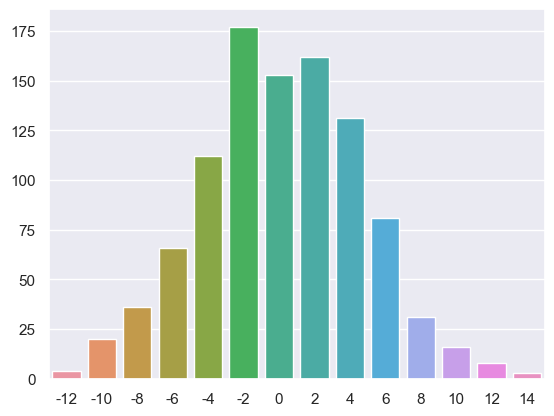

In [2]:
# создаем колодцы, куда будут падать шарики после прохождения препятствий
a = {-5:0, -4:0, -3:0, -2:0, -1:0, 0:0, +1:0, +2:0, +3:0, +4:0, +5:0}

# кидаем 1000 шариков на 20 препятствий
a = {}
for i in range(1000):
    x = 0;
    for j in range(20):
        x += np.random.choice([-1,1])
    a[x] = a.get(x, 0) + 1;
    
sns.set()
# по х - покажем индексы наших колодцев,
# по оси y - сколько шариков в них оказалось
sns.barplot(x=list(a.keys()), y=list(a.values()));

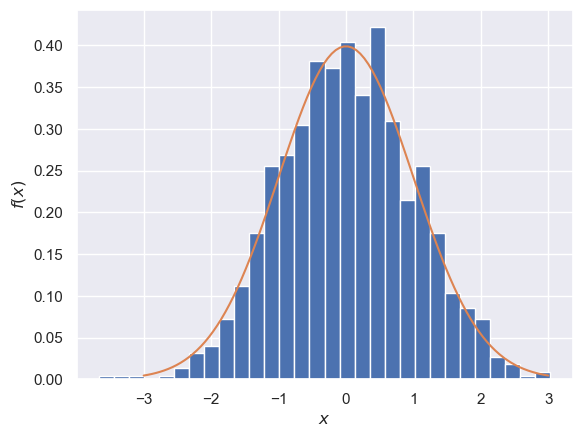

In [3]:
# Генерация случайных величин в python

# задали генератор loc = Mx, scale = S
norm_rv = stats.norm(loc=0, scale=1)

# rvs сгенерирует нам выборку из распределения объёма size
# cdf вычислит значение функции распределения (cumulative distribution function) в указанной точке
# pdf вычислит значение плотности распредеелния (probability density function) в указанной точке
# ppf вычислит квантиль, указанного уровня

sample = norm_rv.rvs(1000)
plt.hist(sample, bins=30, density=True)

x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

***
### <font color = MediumBlue size = 4> <b>Свойства нормального распределения</b> </font>

Рассмотрим две нормально распределенные случайные величины: $X \sim N(\mu_x,\sigma_x^2)$ и $Y \sim N(\mu_y,\sigma_y^2)$

1. $X + Y \sim N(\mu_x+\mu_y,\sigma_x^2+\sigma_y^2)$
<br>

2. $X + a \sim N(\mu_x + a,\sigma_x^2)$
<br>

3. $a \cdot X \sim N(a \cdot \mu_x,a^2 \cdot \sigma_x^2)$

Нормальная случайная величина устойчива к суммированию и линейным преобразованиям.

___
## <font color = DarkGreen size = 5> <b>Z-стандартизация</b> </font>

<u>**Z-стандартизация**</u> \
– преобразование нормального распределения, позволяющее сместить математическое ожидание $\mu_x$ в 0, а стандартное отклонение $\sigma_x$ сделать равной 1.

Такое преобразование полезно, когда мы хотим выяснить какой процент наблюдений лежит выше или ниже определенного значения. В таком случае можно вопользоваться стандартными таблицами *Z-стандартизации*.

Чтобы преобразовать распределение к Z-стандарту, необходимо: \
$\displaystyle z_i = \frac{x_i - \bar{x}}{\sigma_x}$, где \
$z_i$ – преобразованное значение исходного распределения к Z-стандарту \
$x_i$ – исходное наблюдение \
$\bar{x}$ – выборочное среднее

[калькулятор процента наблюдений](https://gallery.shinyapps.io/dist_calc/)


##### <font color = SlateBlue size = 3> Пример </font>

Дана нормально распределенная случайная величина $X \sim N(7, 16)$. Найти $P(X \leq 15)$.

$P(X \leq 15) = P \left( \cfrac{X-7}{4} \leq \cfrac{15-7}{4} \right) = P(N(0,1) \leq 2) = F_{N(0,1)}(2) = \Phi(2) \approx 0.98$ 

___
## <font color = DarkGreen size = 5> <b>Центральная предельная теорема (CLT)</b> </font>

Пусть генеральная совокупность имеет любое распределние со средним арифметическим $\mu$ и дисперсией $\sigma^2$, тогда среднее выборочное $\bar{x}$ стремится к нормальному распределению со средним арифметическим $\mu$ и дисперсией $\displaystyle \frac{\sigma^2}{n}$, где $m$ – объем выборки ($n>30$).

$\bar{x} \to N\left(\mu,\displaystyle \frac{\sigma^2}{n}\right)$
<br><br>

Исследуем некий признак генеральной совокупности. Этот признак может иметь любое распределение. \
Сформируем на основе генеральной совокупности несколько выборочных совокупностей. Для каждой выборочной совокупности найдем ее среднее значение. По мере увеличения количества выборочных совокупностей их средние значения будут стремиться к нормальной форме. \
Таким образом, **центральная предельная теорема** гласит о том, что если взять бесконечное количество выборок, то распределение их среднего значения станет по-настоящему нормальным, а пока выборок меньше, распределение стремится к нормальному. Более того, среднее этого распределения будет равняться среднему генеральной совокупности, а стандартное отклонение будет называться **стандартной ошибкой**.
<br><br>

<u>**Стандартная ошибка среднего**</u> $(se)$ \
– то как в среднем отклоняются все математические ожидания всех возможных выборок с количеством элементов $n$ от их математического ожидания. \
– насколько велик разброс математических ожиданий случайных выборок от реального мат. ожидания генеральной совокупности. \
– среднеквадратическое отклонение распределения выборочных средних.
<br><br>

$\displaystyle se = \frac{\sigma}{\sqrt{n}}$, где \
$\sigma$ – стандартное отклонение генеральной совокупности, \
$n$ – количество элементов в одной выборке, из общего числа выборок взятых наугад.
<br><br>


$\displaystyle se = \frac{S}{\sqrt{n}}$, где \
$S$ – стандартное отклонение наугад взятой выборки, \
$n$ - количество элементов выборки.

> Не путайте стандартное отклонение (которое показывает вариативность отдельных точек данных) со стандартной ошибкой (которая показывает вариативность выборочной метрики).

[Симуляция предельной теоремы](https://gallery.shinyapps.io/CLT_mean/)

___
## <font color = DarkGreen size = 5> <b>Проверка распределения на нормальность</b> </font>

Один из простых способов проверки распределения на нормальность является наложение поверх гистограммы распределения графика нормального распределения.

Вторым способом проверки на нормальность является график QQ-плот. Этот график отражает насколько квантили действительного распределения отличаются (лежат выше или ниже) квантилей Z-распределения или нормального распределения.



In [4]:
#import pylab
#import scipy.stats as stats

mean = 0    # Мат. ожидание
sd = 1     # Стандартное отклонение
N = 100    # Количество наблюдений

# Генерация нормального распределения с мат.ожиданием 0,
# стандартным отклонением 1 и 
# количеством элементов в выборке 100
sample = np.random.normal(loc=mean, scale=sd, size=N) 

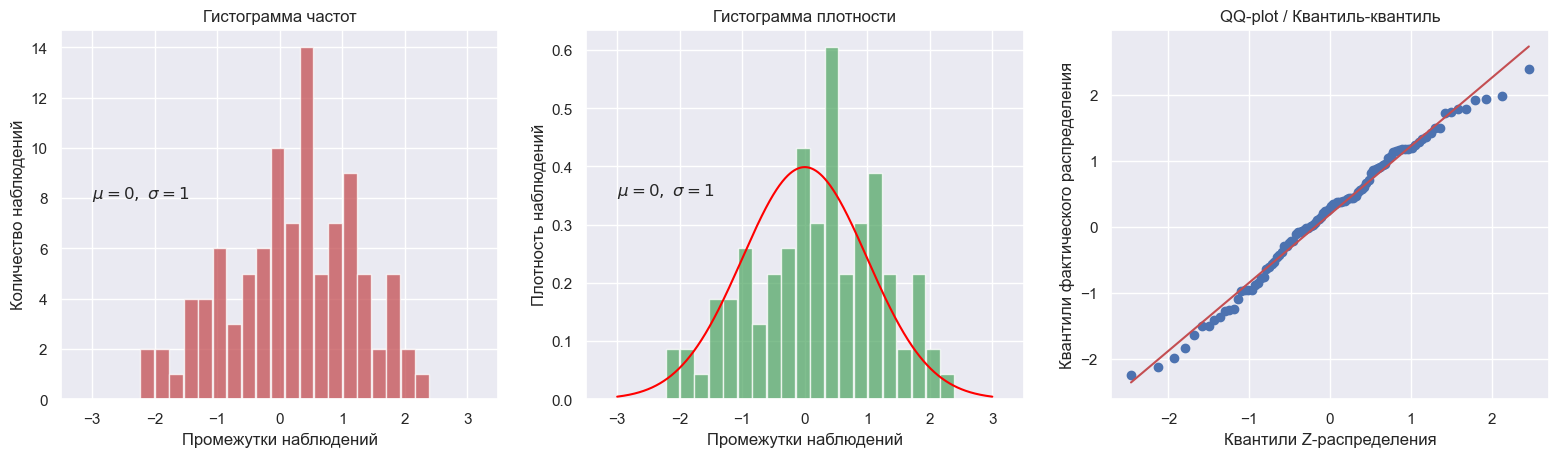

In [5]:
plt.figure(figsize = [6.4*3, 4.8])

# Построим гистограмму частот
plt.subplot(1, 3, 1)
n, bins, patches = plt.hist(sample, N//5, density=False, facecolor='r', alpha=0.75, rwidth=0.95)
plt.title('Гистограмма частот')  # Заголовок
plt.xlabel('Промежутки наблюдений')  # Подпись по оси X
plt.ylabel('Количество наблюдений')  # Подпись по оси Y
plt.text(-3, 8, r'$\mu=0,\ \sigma=1$')  #Текстовая подпись
plt.xlim(-3.5, 3.5)  # Граница оси X
plt.grid(True)  # Включить сетку

# Построим гистограмму c плотностью
plt.subplot(1, 3, 2)
n, bins, patches = plt.hist(sample, N//5, density=True, facecolor='g', alpha=0.75, rwidth=0.95, stacked=True)
plt.title('Гистограмма плотности')  # Заголовок
plt.xlabel('Промежутки наблюдений')  # Подпись по оси X
plt.ylabel('Плотность наблюдений')  # Подпись по оси Y
plt.text(-3, 0.35, r'$\mu=0,\ \sigma=1$')  #Текстовая подпись
plt.xlim(-3.5, 3.5)  # Граница оси X
plt.grid(True)  # Включить сетку

# Построим поверх гистограммы график Z-распределения
x = np.linspace(mean -3*sd, mean + 3*sd, 1000)  # Делаем массив значений Z-распределения
plt.plot(x, stats.norm.pdf(x, mean, sd), color='red')  # Строим график Z-распределения


# Построим график QQ-plot
plt.subplot(1, 3, 3)
# Создаем график QQ-plot при помощи функции по поиску квантелей значений нашего распределения
norm = stats.probplot(sample, dist="norm", plot=plt)
plt.title('QQ-plot / Квантиль-квантиль')  # Заголовок
plt.xlabel('Квантили Z-распределения')  # Подпись по оси X
plt.ylabel('Квантили фактического распределения')  # Подпись по оси Y
plt.grid(True)  # Включить сетку

Еще одной возможностью проверки распределения на нормальность является тест Шапиро-Уилко и Колмогорова-Смирнова.\
В этих тестах за нулевую гипотезу принимается гипотеза о том, что наша выборка принадлежит генеральной совокупности, где значения распределены нормально. Поэтому при получении значения $p-value > \alpha$ у нас будет недостаточно оснований пинять нулевую гипотезу, а потому, мы будем считать, что имеющаяся выборка распредлена нормально.

In [6]:
# выборка до 5000
shapiro_test = stats.shapiro(sample)
print(['Шапиро-Уилко: Выборка распредена ненормально.','Шапиро-Уилко: Выборка распредена нормально.']
      [shapiro_test[1] > 0.05])

# для выборок любого размера
ks_test = stats.kstest(sample, 'norm')
print(['Колмогоров-Смирнов: Выборка распредена ненормально.','Колмогоров-Смирнов: Выборка распредена нормально.']
      [ks_test[1] > 0.05])

Шапиро-Уилко: Выборка распредена нормально.
Колмогоров-Смирнов: Выборка распредена нормально.


**t-критерий Стьюдента, тест Шапиро-Уилко и тест Колмогорова-Смирнова** очень сильно подвержены влияниям выбросов. Даже одно сильно отклоненное значение может искозить результаты с ног до головы. Чтобы такого не происходило, следуюет:
* Очищать выборку от выбросов до применения критериев

* Альтернатива: использовать тест Манн-Уитней

In [7]:
# Еще одна выборка, но распределенная равномерно
sample2 = np.random.uniform(low=-3.0, high=3.0, size=N)

mw_test = stats.mannwhitneyu(sample, sample2)
print(['Манн-Уитни: Выборка распредена ненормально.','Манн-Уитни: Выборка распредена нормально.']
      [mw_test[1] > 0.05])

Манн-Уитни: Выборка распредена нормально.


Неожиданный результат, говорящий о том, что равномерное распределение тоже очень похоже на нормальное при малом количестве наблюдений.